# Kaggle Project (성민주's)
## Dataset

#### URL: https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset

#### Task
StreetEasy is New York City’s leading real estate marketplace. You will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan.

#### Datasets
It has the following columns:

- rental_id
- rent
- bedrooms
- bathrooms
- size_sqft
- min_to_subway
- floor
- building_age_yrs
- no_fee
- has_roofdeck
- has_washer_dryer
- has_doorman
- has_elevator
- has_dishwasher
- has_patio
- has_gym
- neighborhood
- borough

#### Features(x): bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
#### Targets(y): rent

## Data preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [2]:
df = df.drop(['neighborhood','borough','rental_id'],axis = 1)

In [3]:
print(df.columns)
print(len(df.columns))
print(len(df))

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')
15
3539


## Model Construction

### Split Data: Train data,Test Data

In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']] #주택임대료에 영향을 주는 값

y = df[['rent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2)
#train data:test data = 8:2 비율로 나눔

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


---

## Train Model & Select Model (기존 모델)

### ● Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression(fit_intercept = True) #선형회귀
mlr.fit(x_train,y_train)

LinearRegression()

In [7]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]] #14개의 x값(임대료에 영향을 주는 값) 대입
my_predict= mlr.predict(my_apartment) #LinearRegression을 통한 주택 임대료 예측
my_predict #위와같은 x값을 대입했을 때 주택임대료 값

c:\Users\serap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2364.92925063]])

In [8]:
y_predict = mlr.predict(x_test) #x_test를 넣어 예측한 값들을 y_predict이라고 가정
y_predict

array([[ 2683.23115631],
       [ 7859.92953633],
       [ 2525.26477323],
       [ 7326.17003878],
       [ 3978.18598424],
       [15067.45134682],
       [ 6647.33663128],
       [12183.43078205],
       [ 2912.56452547],
       [ 6378.64912864],
       [ 5055.94978747],
       [ 3042.14846908],
       [ 4250.54059729],
       [ 4903.43913653],
       [ 6560.52190663],
       [ 3579.23885089],
       [ 4326.34464575],
       [ 2511.72169562],
       [ 3570.6089403 ],
       [11686.92123431],
       [ 3631.73122492],
       [ 5674.04301696],
       [ 3069.30043702],
       [ 2877.31350461],
       [ 4011.47946814],
       [ 3809.88113265],
       [ 3882.78353635],
       [ 2562.03300912],
       [ 2482.62575751],
       [ 4310.46845941],
       [ 3933.40552484],
       [ 1916.46639265],
       [ 3373.98263604],
       [ 3687.13179848],
       [ 4207.32726287],
       [ 3842.53525431],
       [ 3194.64099914],
       [ 3341.84607845],
       [ 2863.78000324],
       [ 2969.14146145],


#### Linear Regression Graph

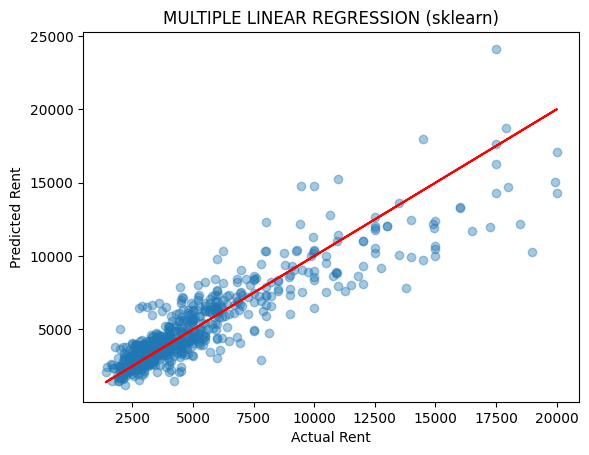

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict,alpha = 0.4)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION (sklearn)')# 다중선형회귀
plt.show() #그래프그려줌

### Set Loss Function

In [10]:
def mse_loss(pre, y): #손실함수 mse함수 정의
    return((pre-y)**2).mean()

In [11]:
mlr.fit(x,y)
pre = mlr.predict(x)

loss_value = mse_loss(pre,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(loss_value) # Linear Regression의 손실함수 결과값

rent    2.207072e+06
dtype: float64


* 손실함수값 : 2,207,072

---

## Train Model & Select Model (새 모델)

* Train/Test Set 유지
* 선택한 Feature 유지
* 즉, 동일 Train/Test Set과 Feature로 새로운 모델 구성

### ● Linear Regression (NN)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
# Tensor 형태로 변경
x = torch.Tensor(x_train.values)
y = torch.Tensor(y_train.values)

In [14]:
# Train Featuer 정규화
mean_x = torch.mean(x, dim=0)
std_x = torch.std(x, dim=0)
nom_x = (x - mean_x) / std_x

nom_x # 정규화한 Train Feature

tensor([[-0.3800, -0.6258, -0.5042,  ..., -0.4810, -0.2495, -0.4664],
        [-0.3800, -0.6258, -0.8348,  ..., -0.4810, -0.2495,  2.1432],
        [-0.3800, -0.6258, -0.6928,  ..., -0.4810, -0.2495, -0.4664],
        ...,
        [ 0.6655,  1.0455,  0.3372,  ..., -0.4810, -0.2495, -0.4664],
        [ 0.6655, -0.6258, -0.0930,  ..., -0.4810, -0.2495, -0.4664],
        [-1.4255, -0.6258, -1.1526,  ..., -0.4810, -0.2495, -0.4664]])

In [15]:
# Train Target 정규화
mean_y = torch.mean(y, dim=0)
std_y = torch.std(y, dim=0)
nom_y = (y - mean_y) / std_y

nom_y # 정규화한 Train Target

tensor([[-0.1005],
        [-0.8501],
        [-0.5907],
        ...,
        [ 0.6953],
        [-0.0686],
        [-0.8326]])

In [16]:
hidden = nn.Linear(14, 28, bias=True)
activation = nn.ReLU() # Feature 중에 비선형 요소(T/F)의 강화를 위해 추가
output = nn.Linear(28, 1, bias=True)

model = nn.Sequential(hidden, activation, output)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [17]:
nb_epochs = 33000
for epoch in range(nb_epochs+1):

    x = nom_x
    y = nom_y
    
    pre = model(x)
    
    cost = F.mse_loss(pre, y) # 기존 모델과 같이 MSE로 손실함수 계산, 여기서는 정규화 값의 손실함수값

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0: # 1000번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/33000 Cost: 0.913256
Epoch 1000/33000 Cost: 0.217338
Epoch 2000/33000 Cost: 0.206768
Epoch 3000/33000 Cost: 0.202156
Epoch 4000/33000 Cost: 0.198822
Epoch 5000/33000 Cost: 0.195918
Epoch 6000/33000 Cost: 0.193217
Epoch 7000/33000 Cost: 0.190840
Epoch 8000/33000 Cost: 0.188624
Epoch 9000/33000 Cost: 0.186645
Epoch 10000/33000 Cost: 0.184785
Epoch 11000/33000 Cost: 0.182969
Epoch 12000/33000 Cost: 0.181317
Epoch 13000/33000 Cost: 0.179935
Epoch 14000/33000 Cost: 0.178619
Epoch 15000/33000 Cost: 0.177545
Epoch 16000/33000 Cost: 0.176562
Epoch 17000/33000 Cost: 0.175664
Epoch 18000/33000 Cost: 0.174906
Epoch 19000/33000 Cost: 0.174163
Epoch 20000/33000 Cost: 0.173461
Epoch 21000/33000 Cost: 0.172742
Epoch 22000/33000 Cost: 0.172023
Epoch 23000/33000 Cost: 0.171168
Epoch 24000/33000 Cost: 0.170238
Epoch 25000/33000 Cost: 0.169275
Epoch 26000/33000 Cost: 0.168322
Epoch 27000/33000 Cost: 0.167481
Epoch 28000/33000 Cost: 0.166622
Epoch 29000/33000 Cost: 0.165735
Epoch 30000/33000 Co

In [18]:
my_apartment_n = torch.tensor([[1,1,620,16,1,98,1,0,1,0,0,1,1,0]]) # 기존 예상값과 같은 값 대입

my_nom_x = (my_apartment_n - mean_x) / std_x # Train Featuer의 평균, 분산을 그대로 반영하여 정규화

my_predict_n = model(my_nom_x) # nn.linear을 이용하여 예상값 산출
my_predict_n = my_predict_n*std_y + mean_y # Train Target의 평균, 분산을 그대로 반영하여 정규화값의 복원

print('sklearn 예측값 : ', my_predict)
print('nn 예측값 : ', my_predict_n)  # 위와같은 x값을 대입했을 때 주택임대료 값

sklearn 예측값 :  [[2364.92925063]]
nn 예측값 :  tensor([[3905.8225]], grad_fn=<AddBackward0>)


In [19]:
test_nom_x = (torch.Tensor(x_test.values) - mean_x) / std_x # Train Featuer의 평균, 분산을 그대로 반영하여 정규화

y_predict_n = model(test_nom_x)
y_predict_n = y_predict_n*std_y + mean_y # Train Target의 평균, 분산을 그대로 반영하여 정규화값의 복원
# x_test를 넣어 예측한 값들을 y_predict_n이라고 가정

#### Linear Regression Graph

* X축 : 실제 주택임대료
* Y축 : 예측 주택임대료
* 각 점은 각 feature에 대한 결과값
* 적색 선은 실제 Y값(x=y)임, 따라서 적색 선에 점들이 수렴할수록 모델의 정확도가 높음

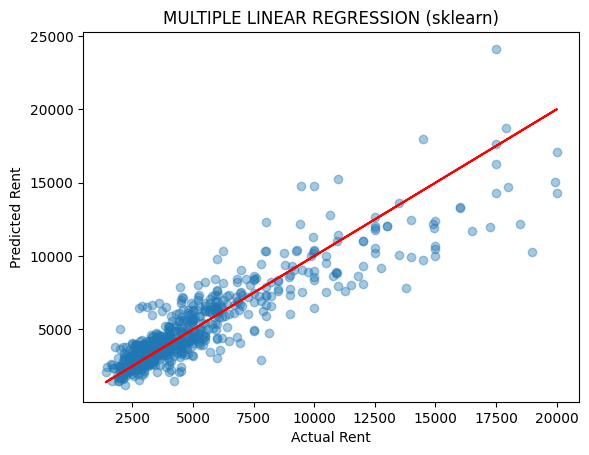

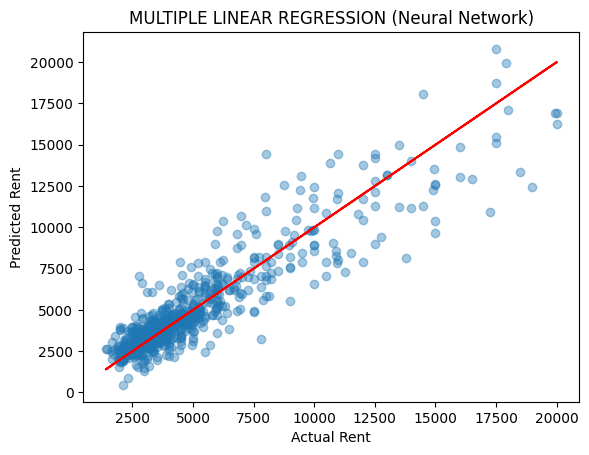

In [20]:
plt.scatter(y_test,y_predict,alpha = 0.4)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION (sklearn)')# 다중선형회귀
plt.show() #그래프그려줌

plt.scatter(y_test,y_predict_n.detach().numpy(),alpha = 0.4)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION (Neural Network)')# nn
plt.show()

In [21]:
loss_value_n = mse_loss(y_predict_n.detach().numpy(),y_test) # nn 모델의 실제 mse값을 구하기 위해 새로 함수 적용, 기존 모델과 동일 조건

print('sklearn loss value : ', loss_value)
print('nn loss value : ', loss_value_n)

sklearn loss value :  rent    2.207072e+06
dtype: float64
nn loss value :  rent    1.766620e+06
dtype: float64


* 손실함수값 : 2,207,072 > 1,766,620으로 성능 개선